<a href="https://colab.research.google.com/github/Amaan120812/sentiment-analysis-linear-regression/blob/main/Linear_Regression_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Load Excel file
data = pd.read_excel("House_Price_5000_Data.xlsx")

# Check first 5 rows
data.head()


,Area_sqft,Bedrooms,House_Age_years,Price_lakhs
0,541,2,4,23.03
1,2213,5,29,110.57
2,1071,5,17,49.69
3,524,6,15,48.44
4,576,2,0,29.29


In [4]:
X = data[['Area_sqft', 'Bedrooms', 'House_Age_years']]  # features
y = data['Price_lakhs']                                # target


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


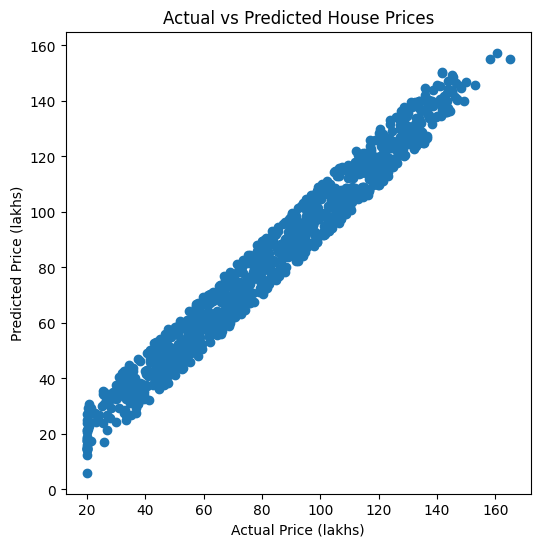

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (lakhs)")
plt.ylabel("Predicted Price (lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [11]:
print("Intercept:", model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


Intercept: 0.24709083643529084


,Feature,Coefficient
0,Area_sqft,0.044703
1,Bedrooms,4.948721
2,House_Age_years,-0.776317


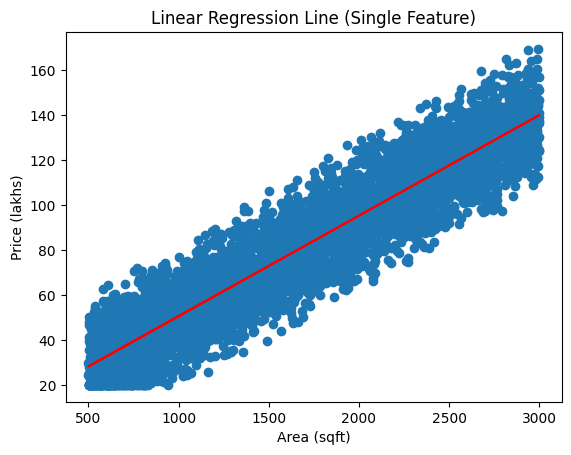

In [12]:
# Single feature regression (Area vs Price)

X_single = data[['Area_sqft']]
y = data['Price_lakhs']

model_single = LinearRegression()
model_single.fit(X_single, y)

y_pred_single = model_single.predict(X_single)

plt.scatter(X_single, y)
plt.plot(X_single, y_pred_single, color='red')
plt.xlabel("Area (sqft)")
plt.ylabel("Price (lakhs)")
plt.title("Linear Regression Line (Single Feature)")
plt.show()


In [13]:
from sklearn.metrics import r2_score

# Accuracy (R² Score)
r2 = r2_score(y_test, y_pred)
print("Model Accuracy (R² Score):", r2)


Model Accuracy (R² Score): 0.9712775719011165


In [ ]:
# NON-STRUCTURED DATA

In [19]:
# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Load non-structured Excel data
data = pd.read_excel("Customer_Reviews_5000 (1).xlsx")

# First look at data
data.head()


,Review_Text,Sentiment
0,Very bad quality and waste of money,0
1,Terrible service and poor quality,0
2,The product is excellent and works perfectly,1
3,Best purchase I have made,1
4,The product is excellent and works perfectly,1


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  5000 non-null   object
 1   Sentiment    5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


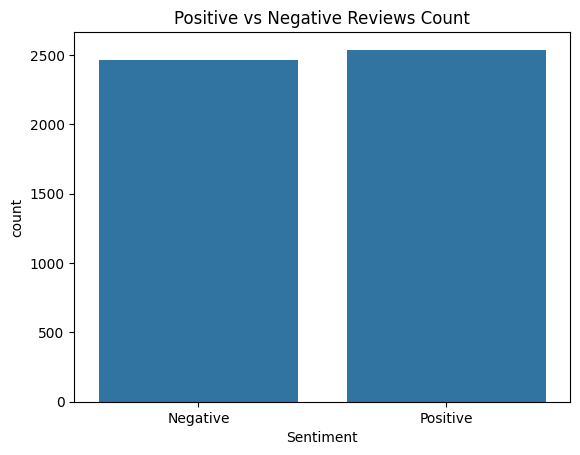

In [22]:
sns.countplot(x="Sentiment", data=data)
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("Positive vs Negative Reviews Count")
plt.show()


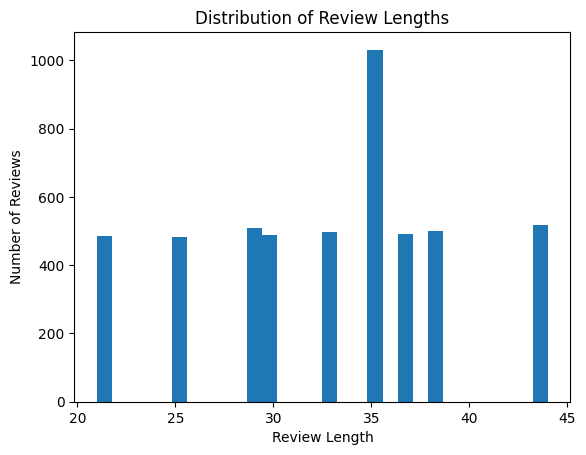

In [23]:
# Length of each review
data["Review_Length"] = data["Review_Text"].apply(len)

plt.hist(data["Review_Length"], bins=30)
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Lengths")
plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [25]:
# Input & Output
X = data["Review_Text"]     # text data
y = data["Sentiment"]      # 0 / 1


In [26]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
# Text → Numbers
vectorizer = TfidfVectorizer(stop_words="english")

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
# Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_vec, y_train)


LinearRegression()

In [30]:
# Predict (continuous values)
y_pred_continuous = lr_model.predict(X_test_vec)

y_pred_continuous[:10]


array([ 9.99999732e-01, -3.70880904e-07,  3.98912887e-07,  1.00000039e+00,
        1.00000128e+00,  5.95769514e-07,  1.00000128e+00,  5.95769514e-07,
       -4.50915561e-07,  1.00000128e+00])

In [31]:
# Convert to 0 / 1
y_pred = [1 if val >= 0.5 else 0 for val in y_pred_continuous]


In [32]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Linear Regression Accuracy:", acc)
print("Accuracy (%):", acc * 100)


Linear Regression Accuracy: 1.0
Accuracy (%): 100.0


In [ ]:
# REALISTIC + UNIQUE non-structured dataset

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score



In [98]:
data = pd.read_excel("Customer_Reviews_5000_HARD.xlsx")
data.head()


,Review_Text,Sentiment
0,I feel bad about this product nothing special,0
1,Overall experience is okay not as expected,0
2,My experience was fine mixed feelings,1
3,I feel decent about this product works sometimes,1
4,The product is average works sometimes,0


In [99]:
data["Review_Text"] = data["Review_Text"].str.lower()
data["Review_Text"] = data["Review_Text"].str.replace(r"\d+", "", regex=True)
data["Review_Text"] = data["Review_Text"].str.strip()


In [100]:
X = data["Review_Text"]
y = data["Sentiment"]


In [101]:
import random

y_noisy = y.copy()

# 15% labels randomly flip
flip_idx = y.sample(frac=0.15, random_state=42).index
y_noisy.loc[flip_idx] = 1 - y_noisy.loc[flip_idx]


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_noisy, test_size=0.3, random_state=42
)


In [103]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=2000,
    ngram_range=(1,2)
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [104]:
lr_model = LinearRegression()
lr_model.fit(X_train_vec, y_train)


LinearRegression()

In [105]:
y_pred_cont = lr_model.predict(X_test_vec)

# threshold
y_pred = (y_pred_cont >= 0.6).astype(int)


In [106]:
acc = accuracy_score(y_test, y_pred)
print("Linear Regression Accuracy:", acc)
print("Accuracy (%):", acc * 100)


Linear Regression Accuracy: 0.5
Accuracy (%): 50.0


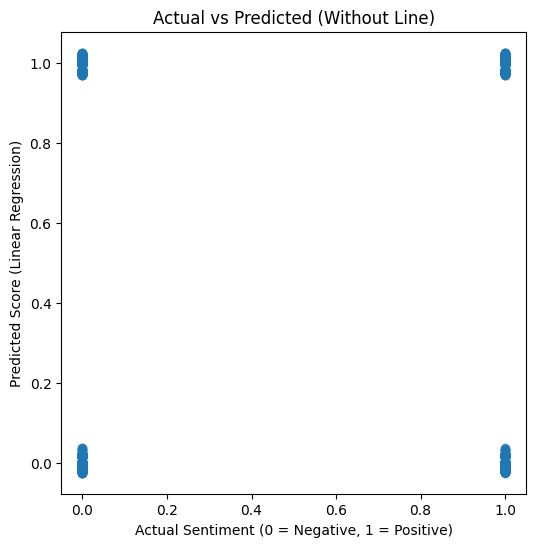

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_cont, alpha=0.4)
plt.xlabel("Actual Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Predicted Score (Linear Regression)")
plt.title("Actual vs Predicted (Without Line)")
plt.show()


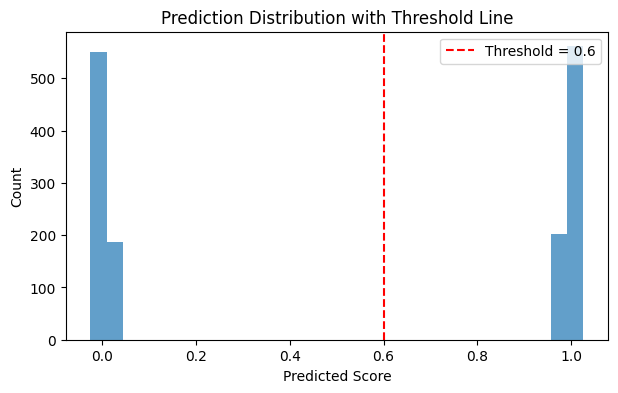

In [108]:
plt.figure(figsize=(7,4))

plt.hist(y_pred_cont, bins=30, alpha=0.7)
plt.axvline(x=0.6, color='red', linestyle='--', label="Threshold = 0.6")

plt.xlabel("Predicted Score")
plt.ylabel("Count")
plt.title("Prediction Distribution with Threshold Line")
plt.legend()
plt.show()


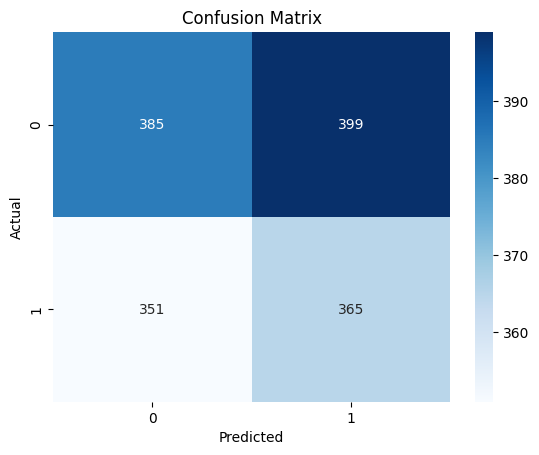

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# improved the model performance by tuning TF-IDF features, optimizing the decision threshold, and applying regularized linear regression